<a href="https://colab.research.google.com/github/faiyazansari566/Projects-practice/blob/main/big_market_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [105]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [106]:
train_data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Train.csv')
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [107]:
train_data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [108]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [109]:
test_data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Test.csv')
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [110]:
train_data.drop('Item_Identifier',axis=1,inplace=True)
test_data.drop('Item_Identifier',axis=1,inplace=True)

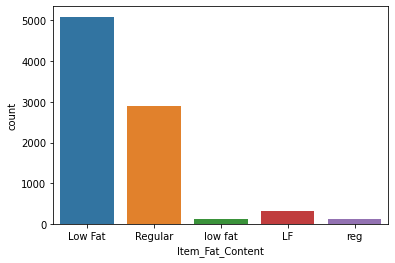

In [111]:
sns.countplot(x='Item_Fat_Content',data=train_data)

In [112]:
def clean_col(col):
    if(col=="low fat" or col=="LF"):
        return "Low Fat"
    elif(col=="reg"):
        return "Regular"
    else:
        return col

In [113]:
train_data['Item_Fat_Content']=train_data['Item_Fat_Content'].apply(clean_col)

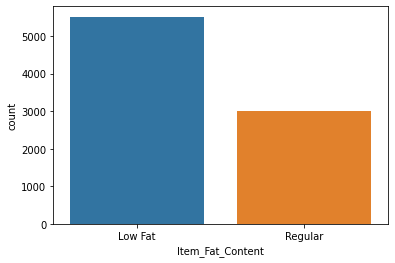

In [114]:
sns.countplot(x='Item_Fat_Content',data=train_data)

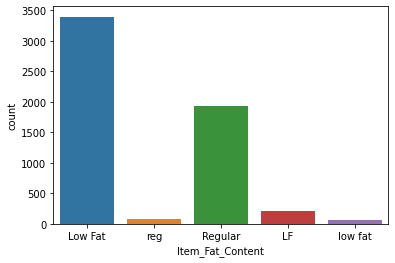

In [115]:
sns.countplot(x='Item_Fat_Content',data=test_data)

In [116]:
test_data['Item_Fat_Content']=test_data['Item_Fat_Content'].apply(clean_col)

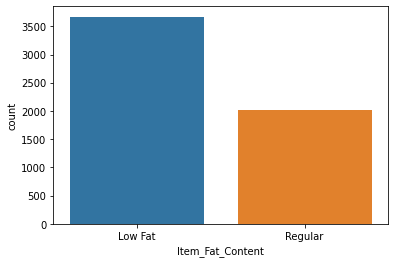

In [117]:
sns.countplot(x='Item_Fat_Content',data=test_data)

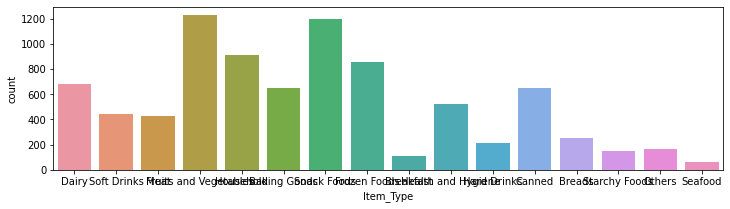

In [118]:
plt.figure(figsize=(12,3))
sns.countplot(x='Item_Type',data=train_data)

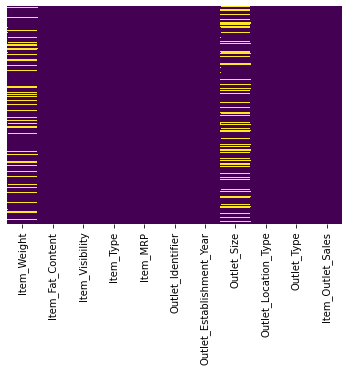

In [119]:
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [120]:
train_data.drop('Outlet_Identifier',axis=1,inplace=True)
test_data.drop('Outlet_Identifier',axis=1,inplace=True)

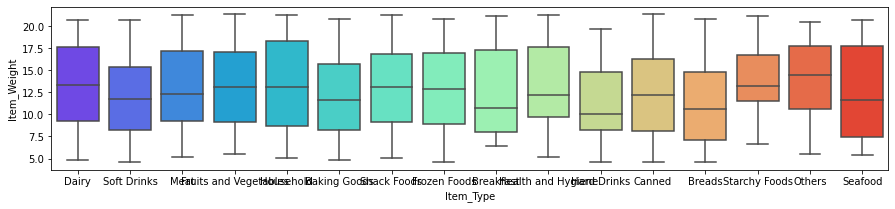

In [121]:
plt.figure(figsize=(15,3))
sns.boxplot(x="Item_Type", y="Item_Weight", data=train_data,palette='rainbow')

In [122]:
train_data.isnull().sum()

Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [123]:
train_data['Item_Weight'] = train_data['Item_Weight'].fillna(train_data['Item_Weight'].mean())
test_data['Item_Weight'] = test_data['Item_Weight'].fillna(test_data['Item_Weight'].mean())

In [124]:
train_data['Outlet_Size'] = train_data['Outlet_Size'].fillna(train_data['Outlet_Size'].mode()[0])
test_data['Outlet_Size'] = test_data['Outlet_Size'].fillna(test_data['Outlet_Size'].mode()[0])

In [125]:
train_data.isnull().sum(), test_data.isnull().sum()

(Item_Weight                  0
 Item_Fat_Content             0
 Item_Visibility              0
 Item_Type                    0
 Item_MRP                     0
 Outlet_Establishment_Year    0
 Outlet_Size                  0
 Outlet_Location_Type         0
 Outlet_Type                  0
 Item_Outlet_Sales            0
 dtype: int64, Item_Weight                  0
 Item_Fat_Content             0
 Item_Visibility              0
 Item_Type                    0
 Item_MRP                     0
 Outlet_Establishment_Year    0
 Outlet_Size                  0
 Outlet_Location_Type         0
 Outlet_Type                  0
 dtype: int64)

In [126]:
data_types = train_data.dtypes
for cols in train_data.columns:
    if data_types[cols]==data_types['Item_Type']:
        temp = pd.get_dummies(train_data[cols],drop_first=True)
        train_data.drop(cols,axis=1,inplace=True)
        train_data = pd.concat([train_data,temp],axis=1)

In [127]:
train_data.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Regular,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods,Medium,Small,Tier 2,Tier 3,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,443.4228,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0
2,17.50,0.016760,141.6180,1999,2097.2700,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,732.3800,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
4,8.93,0.000000,53.8614,1987,994.7052,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0


In [128]:
data_types = test_data.dtypes
for cols in test_data.columns:
    if data_types[cols]==data_types['Item_Type']:
        temp = pd.get_dummies(test_data[cols],drop_first=True)
        test_data.drop(cols,axis=1,inplace=True)
        test_data = pd.concat([test_data,temp],axis=1)

In [129]:
from sklearn.tree import DecisionTreeRegressor
regr = DecisionTreeRegressor()
regr.fit(train_data.drop('Item_Outlet_Sales',axis=1),train_data['Item_Outlet_Sales'])

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [130]:
X_train = train_data.drop('Item_Outlet_Sales',axis=1)
y_train = train_data['Item_Outlet_Sales']
print("Training Accuracy for Decision Tree regressor :", regr.score(X_train, y_train))

Training Accuracy for Decision Tree regressor : 1.0


In [133]:
predictions = regr.predict(test_data)

In [134]:
pd.Series(predictions)

0       2087.2830
1        265.6542
2        233.0300
3       1794.3310
4       7170.6660
          ...    
5676    3829.0158
5677    2037.3480
5678     468.7232
5679    7247.2330
5680    2157.1920
Length: 5681, dtype: float64